In [1]:
#Imports

import time

import requests
import bs4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def episodes_rates(url_serie):
    """Rates of episodes.
    Parameters:
    url_serie (string): Web page of the serie
    Returns:
    df (data frame): The dataframe contains the rates of the episodes. 
    The rows represent the seasons and the columns the episodes.
    """

    # initial serie and season
    url = url_serie
    url_season = '?season=1'

    rates_all = []
    num_season = 0

    while True:
        # number of seasons
        num_season += 1
        # obtain the html code as a string   
        response = requests.get(url_serie + url_season)
        html = response.text
        # create a BeautifulSoup object
        soup = bs4.BeautifulSoup(html, "html.parser")

        rates_season = {}
        # we obtain all division tags with the class attribute "ipl-rating-star small"
        division_tags = soup.find_all(class_="ipl-rating-star small")
        
        # we loop through the tags and extract the scores
        # we create a dictionary with the scores
        for index, tag in enumerate(division_tags):
            rate = tag.find(class_="ipl-rating-star__rating").text
            episode = 'Episode_' + str(index + 1)
            # we insert the score in the dictionary
            rates_season[episode] = float(rate)
            
        # we append the dictionary to a list
        rates_all.append(rates_season)
        
        # get next season anchor tag
        next_season = soup.find("a", id="load_next_episodes")
        # if next_season equal to None break the loop
        if not next_season:
            break
        # if next_season is not equal to None, we access the url     
        url_season = next_season.get('href')
        
        time.sleep(0.2)
    
    df = pd.DataFrame(rates_all, index=list(map(lambda x: 'Season_' + str(x+1), range(num_season))))
    
    # drop a row if all values are null
    df.dropna(how='all', inplace=True)
    
    return df

In [14]:
def webpage_to_heatmap(web_page, color_map, title):
    """Rates of episodes.
    Parameters:
    web page (string): Web page of the serie
    color_map (string): Color map of the heatmap
    title (string): Title of the heatmap
    Returns: None
    """
    # obtain a data frame with the rates
    df = episodes_rates(web_page)

    # create a heatmap using the dataframe
    figure = plt.figure(figsize=(df.shape[1]*0.75, df.shape[0]*0.75))
    sns.heatmap(df, annot=True, cmap=color_map, annot_kws={"size":12})

    plt.xticks(fontsize=14)
    plt.yticks(rotation=0, fontsize=14)

    plt.title(title, fontsize=24)
    return figure

In [15]:
# Color palettes - https://seaborn.pydata.org/tutorial/color_palettes.html

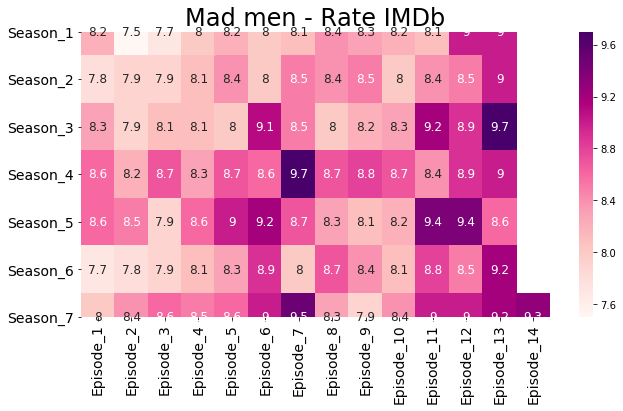

In [16]:
web_page = 'https://www.imdb.com/title/tt0804503/episodes'
color_map = 'RdPu'
title = 'Mad men - Rate IMDb'
figure = webpage_to_heatmap(web_page, color_map, title)

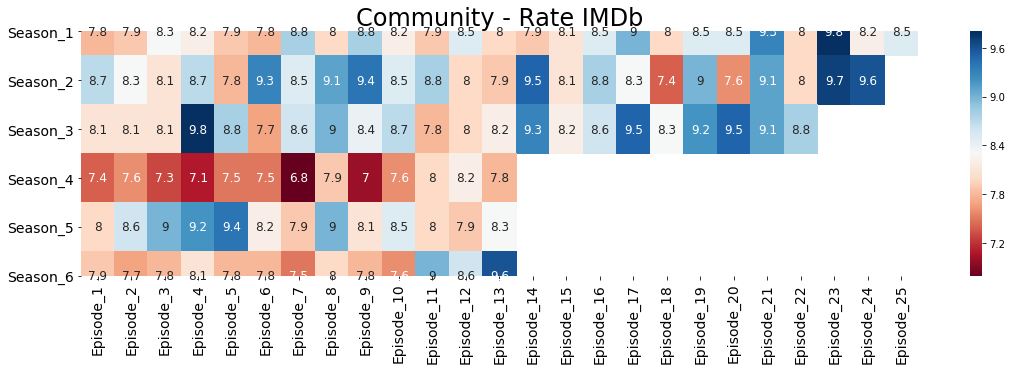

In [17]:
web_page = 'https://www.imdb.com/title/tt1439629/episodes'
color_map = 'RdBu'
title = 'Community - Rate IMDb'
figure = webpage_to_heatmap(web_page, color_map, title)